In [1]:
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph
from itertools import product

# 6. Richer Representations: Beyond the Normal and Extensive Forms

There are several reasons we want to explore other forms of game. Firstly, so far we have assumed a lot of finite variables. The number of decisions / time is finite, the players are finite, and the actions have been finite. We may want to consider what happens for infinite agents, or for games which are repeated forever. Secondly, so far we have assumed that agents share a knowledge of eachother's payoffs. This is very unrealistic! Thirdly, we would like to find more compact ways of describing games, for the sake of efficiency.

## 6.1 Repeated games

Consider a game like the prisoner's dilemma, in normal form, which is played multiple times. In the case that agents have no information about previous games the answer is pretty trivial. However, if agents can see what happened before then things become more complicated.

### 6.1.1 Finitely repeated games

With a finitely repeated game we simply need a bigger table in the normal form (or tree in the extensive form) to capture the strategies and payoffs for both players. We assume that agents don't know what eachother will play, but find out later. One simple answer is just to play the same strategy at each game level, which we call a *stationary strategy*. But in general, the action can depend on what was played before.

All finitely repeated games can be represented as imperfect-information tree in extensive form. Player 1 does and action, then player 2 does an action (unknown by player 1), then both players see the result.

### 6.1.2 Infinitely repeated games

If a game is repeated infinitely we get an infinite tree of decisions. In order to quantify the reward of being in a state we can consider the average reward over all games, or a discounted reward of future games (i.e., the agent cares more about the present, or the games might end at some random point). 

In infinitely repeated games there are strategies other than the stationary ones. For instance we have Tit-for-Tat (TfT) in which players start by cooperating and then repeat whatever their opponent's strategy was.

Ideally we want to be able to calculate the equilibirum strategies in infinitely repeated games. A good place to start is the **The Folk Theorem**, which states that an equilibrium exists for any average payoffs where the agents are each avoiding their worst outcome. These are equilibrium because players can threaten to cause the worst outcome of another in perpetuity if they deviate. Consider this game:

$
\begin{array}{c|ccc}
\text{} & A & B \\
\hline
\text{A} & 4,4 & 1,5 \\
\text{B} & 5,1 & 0,0 \\
\end{array}
$

If we just analyse this as a one-off game we see there are two equilibria, at (A,B) and (B,A). But in the infinite case there is also the equilibria at (A,A). This is because both players can threaten to play B for the rest of time, if their opponent does. Remaining at A becomes an equilibrium strategy. We say (A,A) is *enforcable*.

Note this fits for *any* set of enforable payoffs, not just the strategies that can be used. For instance, consider this game:

$
\begin{array}{c|ccc}
\text{} & A & B \\
\hline
\text{A} & 0,0 & 0,1 \\
\text{B} & 1,0 & 0,0 \\
\end{array}
$

Say the agents are swapping between (A,B) and (B,A) each game. The average payoff is 0.5 for each. The row player can enforce this system by threatening to play B forever onwards if the column player deviates, and likewise the column player can threaten to play A forever if the row player deviates.

While this is useful, it is very broad. For instance, if the strategy is to play (A,B) 99 times for every (B,A) this is still enforcible by the column player, thought it's unfair.

### 6.1.3 "Bounded rationality": repeated games played by automata

The big problem when dealing with repeated games is that there are many more options to choose from. This imposes a computational burden on the decision maker, which reduces their ability to be fully rational. We simply can't crunch out all the options. At the same time, people don't behave as we would expect from any rational model. Consider the finitely repeated prisoner's dilemma. When playing the last game it is obviously optimal to defect, there are no more games to worry about. But then if that's the case, and we expect our opponent to defect as well, then we should also defect one game earlier. And so it unwinds completely. But in reality people tend to cooperate at first instead. What other models might explain this fact?

One early proposal was the idea of $\epsilon$-equilibrium, which is where agents accept a given strategy so long as they are losing no more than $\epsilon$ by sticking with it. I.e., the players can absorb some small loss. The nash equilibria is then just a special case at $\epsilon=0$. Consider the Centipede game, where at each point the players if they cooperate alternate between receiving +2 and -1:

$
\begin{array}{ccccccccc}
\text{A:} & 2 & 1 & 3 & 2 & 4 & 3 & 5\\
\text{B:} & 0 & 2 & 1 & 3 & 2 & 4 & 3 \\
\end{array}
$

In the fully rational case B will stop cooperating at the second-to-last step, as 4>3. Given that, A will stop at the third-to-last, and so on. Eventually the most rational thing for both players is to defect as soon as possible. But if we use $\epsilon>1$, then neither player will mind losing at the last stage, and the chain goes right to the end.

Another option, and one with a lot of success, is to restrict agent's behaviours to those which can be implemented by an automata. This fits nicely with the imperfect-information form tree, where we need to make a decision at each information-set. An example automata might be something like this:

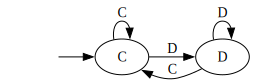

In [2]:
graph1 = Digraph()
graph1.attr(rankdir='LR')
graph1.node('Start', '', style='invis')
graph1.node('C', 'C')
graph1.node('D', 'D')
graph1.edge('Start', 'C', '', color="black")
graph1.edge('C', 'C', 'C', color="black")
graph1.edge('C', 'D', 'D', color="black")
graph1.edge('D', 'C', 'C', color="black")
graph1.edge('D', 'D', 'D', color="black")
display(graph1)

This is a representation of the classic Tit-for-Tat strategy. An automata is just a specification of a list of states, an action to take each state, and a transition function for every action taken (including other player's). We can say that both players will decide which automata to use before the game, and put a limit on the size of the automata to constrain rationality. In order to do backwards-induction on a game with $k$ iterations you need at least $k$ states.

Player's strategies are now essentially just about which automata to use. A nash equilibrium is where both player's can't improve their current scores by switching. If we limit ourselves to the pure strategies we can do a fairly simple search of all automata in a two-player game of a given size:

In [3]:
def getAll2Player2Action2StatePureAutomata():
    # actions
    possible_actions = list(product(range(2), range(2))) # there are 2 states, and 2 actions in each to choose from
    
    # transitions (current state, player 2 action, new state), e.g., ((1, 0), (0, 1))
    possible_transitions = list(product(product(range(2), repeat=2), repeat=2))

    # automata
    automata = list(product(possible_actions, possible_transitions)) # combinations of action and transition function
    
    return automata

In [4]:
def testAutomata(automata1,automata2,num_games,payoffs1,payoffs2):
    state1 = 0
    state2 = 0
    rewards1 = 0
    rewards2 = 0
    automata1Actions, automata1Transitions = automata1[0], automata1[1]
    automata2Actions, automata2Transitions = automata2[0], automata2[1]
    for i in range(num_games):
        action1 = automata1Actions[state1]
        action2 = automata2Actions[state2]
        state1 = automata1Transitions[state1][action2]
        state2 = automata2Transitions[state2][action1]
        rewards1+=payoffs1[action1][action2]
        rewards2+=payoffs2[action1][action2]
    return rewards1/num_games, rewards2/num_games

In [5]:
payoffs1 = np.array([[3,0],[5,1]])
payoffs2 = np.array([[3,5],[0,1]])
num_games = 30
all_automata = getAll2Player2Action2StatePureAutomata()
score1_matrix = np.zeros((len(all_automata),len(all_automata)))
score2_matrix = np.zeros((len(all_automata),len(all_automata)))
for i in range(len(all_automata)):
    for j in range(len(all_automata)):
        score1, score2 = testAutomata(all_automata[i],all_automata[j],num_games,payoffs1,payoffs2)
        score1_matrix[i,j]=score1
        score2_matrix[i,j]=score2

In [6]:
# get the equilibria
player1MaxScore = np.max(score1_matrix,axis=0) # player 1 best automata given the automata for player 2
player2MaxScore = np.max(score2_matrix,axis=1) # player 2 best automata given the automata for player 1
player1MaxScoreRepeat = player1MaxScore.reshape(1,-1).repeat(len(player1MaxScore),axis=0)
player2MaxScoreRepeat = player2MaxScore.reshape(-1,1).repeat(len(player2MaxScore),axis=1)
isBestPlayer1 = np.isclose(score1_matrix,player1MaxScoreRepeat)
isBestPlayer2 = np.isclose(score2_matrix,player2MaxScoreRepeat)

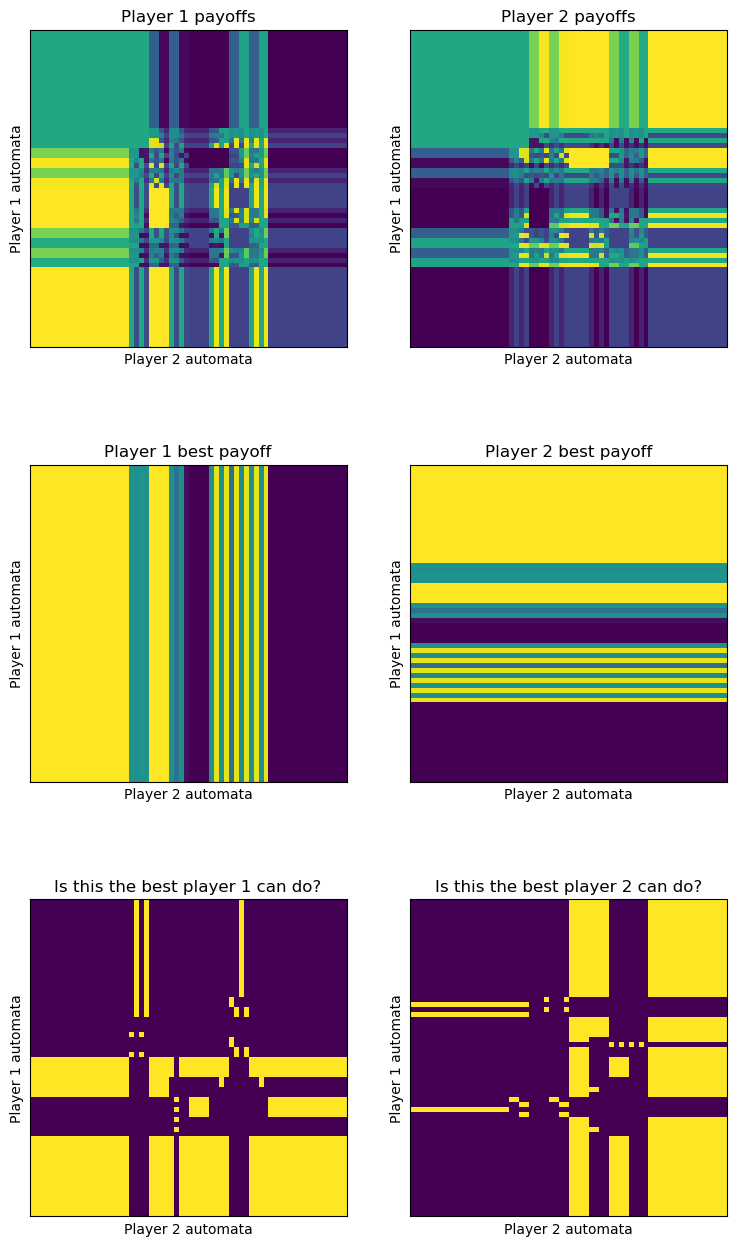

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(9, 16))  # 1 row, 2 columns
axes[0][0].imshow(score1_matrix, interpolation='none')
axes[0][0].set_title("Player 1 payoffs")
axes[0][1].imshow(score2_matrix, interpolation='none')
axes[0][1].set_title("Player 2 payoffs")
axes[1][0].imshow(player1MaxScoreRepeat, interpolation='none')
axes[1][0].set_title("Player 1 best payoff")
axes[1][1].imshow(player2MaxScoreRepeat, interpolation='none')
axes[1][1].set_title("Player 2 best payoff")
axes[2][0].imshow(isBestPlayer1, interpolation='none')
axes[2][0].set_title("Is this the best player 1 can do?")
axes[2][1].imshow(isBestPlayer2, interpolation='none')
axes[2][1].set_title("Is this the best player 2 can do?")
for row in axes:
    for ax in row:
        ax.set_xlabel("Player 2 automata")
        ax.set_ylabel("Player 1 automata")
        ax.set_xticks([])
        ax.set_yticks([])
plt.show()

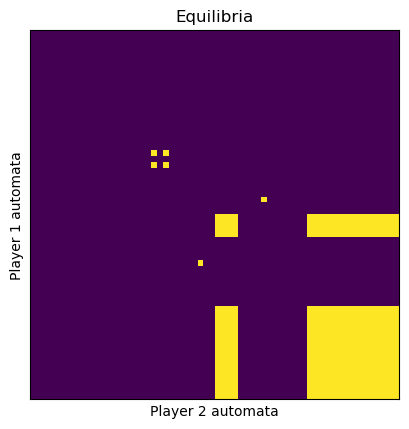

In [8]:
fig = plt.Figure(figsize=(6,6))
both_best = (isBestPlayer1==1)*(isBestPlayer2==1)
plt.imshow(both_best, interpolation='none')
plt.title("Equilibria")
plt.gca().set_xlabel("Player 2 automata")
plt.gca().set_ylabel("Player 1 automata")
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.show()

The automata in the bottom right corner are those where the action is always to defect, regardless of what the other did:

In [9]:
print(all_automata[-1])
print(all_automata[-2])
print(all_automata[-3])

((1, 1), ((1, 1), (1, 1)))
((1, 1), ((1, 1), (1, 0)))
((1, 1), ((1, 1), (0, 1)))


The first two numbers are the actions to take in each state. In this case they are both 1 (defect). The other 4 numbers are the new states to transition to, dependent on the current state and the action of the other player. Current state x other player action -> new state.

Interestingly, there are some options which don't just defect:

In [10]:
equilibriaAutomata1, equilibriaAutomata2 = np.where(both_best==1)
for i in range(len(equilibriaAutomata1)):
    automata1 = all_automata[int(equilibriaAutomata1[i])]
    automata2 = all_automata[int(equilibriaAutomata2[i])]
    if not automata1[0] == (1,1) and not automata2[0] == (1,1):
        print(int(equilibriaAutomata1[i]), "Automata 1:",automata1,"Automata 2:",automata2)

21 Automata 1: ((0, 1), ((0, 1), (0, 1))) Automata 2: ((0, 1), ((0, 1), (0, 1)))
21 Automata 1: ((0, 1), ((0, 1), (0, 1))) Automata 2: ((0, 1), ((0, 1), (1, 1)))
23 Automata 1: ((0, 1), ((0, 1), (1, 1))) Automata 2: ((0, 1), ((0, 1), (0, 1)))
23 Automata 1: ((0, 1), ((0, 1), (1, 1))) Automata 2: ((0, 1), ((0, 1), (1, 1)))
29 Automata 1: ((0, 1), ((1, 1), (0, 1))) Automata 2: ((1, 0), ((1, 0), (0, 0)))
32 Automata 1: ((1, 0), ((0, 0), (0, 0))) Automata 2: ((1, 0), ((0, 0), (0, 0)))
32 Automata 1: ((1, 0), ((0, 0), (0, 0))) Automata 2: ((1, 0), ((0, 0), (0, 1)))
32 Automata 1: ((1, 0), ((0, 0), (0, 0))) Automata 2: ((1, 0), ((0, 0), (1, 0)))
32 Automata 1: ((1, 0), ((0, 0), (0, 0))) Automata 2: ((1, 0), ((0, 0), (1, 1)))
33 Automata 1: ((1, 0), ((0, 0), (0, 1))) Automata 2: ((1, 0), ((0, 0), (0, 0)))
33 Automata 1: ((1, 0), ((0, 0), (0, 1))) Automata 2: ((1, 0), ((0, 0), (0, 1)))
33 Automata 1: ((1, 0), ((0, 0), (0, 1))) Automata 2: ((1, 0), ((0, 0), (1, 0)))
33 Automata 1: ((1, 0), ((0,

We can look at what these automata are:

In [11]:
equilibriaAutomata1NotDD = np.unique([i for i in equilibriaAutomata1 if not all_automata[i][0]==(1,1)])
for i in equilibriaAutomata1NotDD:
    print(all_automata[i])

((0, 1), ((0, 1), (0, 1)))
((0, 1), ((0, 1), (1, 1)))
((0, 1), ((1, 1), (0, 1)))
((1, 0), ((0, 0), (0, 0)))
((1, 0), ((0, 0), (0, 1)))
((1, 0), ((0, 0), (1, 0)))
((1, 0), ((0, 0), (1, 1)))
((1, 0), ((1, 0), (0, 0)))


The first strategy here is just tit-for-tat. It will cooperate if it is in state 0, then will switch to state 1 if the other player defects, switching back to state 0 if the other player cooperates. The second strategy is the same, but it doesn't allow switching back. The third strategy is interesting, and basically says that the player will cooperate in state 0 but switch to state 1 immediately, then coming back to state  0 if the other player defects. This is in a strange equilibrium with a strategy where player 2 does the same, but flipping state 1 for state 0 instead. If player 1 cooperates and player 2 defects then the next round player 1 will defect and player 2 will cooperate. This flips back and forth between them! The next 4 are all just naive cooperators, and the final one is the pair to the third.

A number of interesting results can be shown about these automata. For instance, in the prisoner's dilemma there is a theorem that for any finite state size there is a number of games for which a nash equilibria exists other than (1,1), and often considerably better.

Another thing we can do is impose a cost for complexity rather than limiting it directly. In particular, we can say that complexity is a tie-breaker and when two automata achieve the same outcome the simpler one is prefered. Consider the trigger strategy from above, where the player stops cooperating as soon as the other defects. When this strategy comes up against a naive cooperator they both get the same result, but the naive cooperator is a simpler model, and doesn't need any states at all! Therefore, you could say that the trigger strategy is not an equilibrium actually, but a threat to the other player.

**Computing best-response automata**

Unfortunately it can be proved that there is no polynomial time algorithm, given an unknown number of players, for verifying whether a particular automata is a best response. This is true even if the players are constrained to choose a single automata. If we allow mixed strategies even the two-player game is NP-complete. 

However, it's not all bad. If I know the number of players, as well as which automata each player will play, then problem is then just a standard MDP (there are finite states the other player's can be in and, given your action, there is a deterministic transition). This can be solved in any of the usual ways. For example, say your opponent is playing tit-for-tat. Then the states are just whether you cooperated or defected. And your actions are just to cooperate or defect. So the transition matricies are:

*If you cooperate:*

$
\begin{array}{c|ccc}
\text{} & C & D \\
\hline
\text{C} & 1 & 0 \\
\text{D} & 1 & 0 \\
\end{array}
$

*If you defect:*

$
\begin{array}{c|ccc}
\text{} & C & D \\
\hline
\text{C} & 0 & 1 \\
\text{D} & 0 & 1 \\
\end{array}
$

Interestingly if you add a limit on the number of states the problem of checking whether an automata is a best-response becomes NP-hard again. Why? Well, in the above case we are able to solve the MDP easily because we just need to compute the best action, knowing the whole joint state. But any automata to implement that actually requires a number of states equal to the total joint space. If we have an automata of a limited size, smaller than the number of states in the joint space, then we can't do this. We have to implement a restricted policy.

**From finite automata to Turing machines**

Turing machines have an infinite memory, which makes them much more powerful than a finite automata. You would think that turing machines, being able to count and memorize history, would be unable to cooperate on something like the infinite prisoner's dilemma, but interestingly they get very close to the optimal CC outcome. Interestingly it can be proved that when a discount factor gets sufficiently close to 1 it is not possible to compute a best-response turing machine at all (nevermind, compute in NP time). As well as this it can be shown that the best-response to a turing-machine may not be possible to implement with a turing machine itself.